In [276]:
%matplotlib inline
import numpy as np
import scipy.signal as signal    # Notice this one is new!
import matplotlib.pyplot as plt
from matplotlib import cm as colormap
from mpl_toolkits.mplot3d import Axes3D
import math
import cmath
from scipy import interpolate 
from scipy.spatial import distance 
from copy import deepcopy

(369, 238)
(2, 3721)
(2, 84101)
black_coord(Test)
[[1. 1.]
 [1. 2.]
 [1. 3.]
 [2. 1.]
 [2. 3.]]


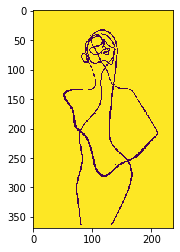

In [277]:
#import image 
Test = np.array([[1,1,1,1,1], [1,0,0,0,1], [1,0,1,0,1], [1,1,1,1,1]])
#SHOOT this whole thing should be a function probably. 
def Import(photo):
    img = plt.imread(photo)
    plt.figure()
    #plt.imshow(img)
    return img

#turn image into array 
def NotGray(thresh, image):
    imarray = np.array(image)
    #makeit truely black and white:
    for i in range(len(imarray)):
        for j in range(len(imarray[0])):
            #print(imarray[0][0])
            for k in range(3):
                #thresh = 200             #by raising this will pick up more grey values included
                                        #will be darker/more continuous but also more noisy- this might becom param of eqn.
                if imarray[i][j][k] < thresh:
                    imarray[i][j][k]=0     #0 is what 'black' is for python color codes
                else: imarray[i][j][k]=255 #255 is 'white' 
    return imarray
img = Import('greyish.jpg')
imarray = NotGray(230, img)
plt.imshow(imarray) #this will show the pure black and white image
                            #These following lines are just to check that now each triplet have the same values(it comes from the RGB plt.imread)
                            #for i in range(len(imarray)):            
                            #    for j in range(len(imarray[0])):
                            #        for k in range(len(imarray[0][0])):
                            #             if imarray[i][j][k] != imarray[i][j][0]:
                            #                print(imarray[i][j])
def CollapseRBG(array):  #array is NxMx3
    bwimarray = np.zeros([len(array), len(array[0])])  #Here I am turning my RBG array into a BW array (Collapsing third dim)
    for i in range(len(array)):
        for j in range(len(array[0])):
            bwimarray[i][j] = array[i][j][0]    #Setting each element the array to the last elemet of the triplet since they are all the same.      
    return bwimarray                                        #This might be kinda messed up if the photo you upload isnt black and white. But it shouldent be too messed up

bwimarray = CollapseRBG(imarray)
print(np.shape(bwimarray))
plt.imshow(bwimarray)
def BWCoords(array):
    black = np.where(bwimarray == 0)     #these are the locations of each black pixel
    white = np.where(bwimarray == 255)    #these are the locations of each white pixel
    return black, white

black, white = BWCoords(bwimarray)
print(np.shape(black))
print(np.shape(white))
#print(black)
#print(bwimarray[black])

#print(white)
#print(bwimarray[white])

w_index = white[0] #These are the locations? of each white pixel 
#obj1 = enumerate(trythis)

bwimarray_copy = bwimarray
for num, pixel in enumerate(w_index):
    bwimarray_copy[pixel] = num+1


    
    
def black_coords(array):
    black = np.where(array==0)
    b = np.zeros([len(black[0]),2])
    #print(len(black[0]))
    for i in range(len(black[0])):
        coord = np.array([black[0][i], black[1][i]])
        b[i] = coord
    return b
print('black_coord(Test)')    
print(black_coords(Test))

def PairCoord_Index(start, coordslist): 
    """
    start needs to be an np.array([x,y]) where [x,y] in coordlist
    and x, y are floats
    this is going to be finicky 
    """
    pair_dict = dict()
    start_str = str(start)
    for i in enumerate(coordslist):
        coord_str = str(i[1])
        #print(coord_str)
        pair_dict[coord_str] = i[0]
    return pair_dict[start_str]


###distance between each black coord with another
def Distance(coord_list):
    distance_matrix = distance.cdist(coord_list, coord_list)
    return distance_matrix



 #I have no idea why this is now showing a yellow and purple image? 
#print('rels and pix are:',bwimarray_copy[pix])

#having checked this with rainbows, it honestly workes as expected. a little slow for a 440 KB photo, rel fast for 140 KB
#for rainbow picture with lower thresh, will be difference in bwimarray with what is plotted(choosing R, B or G)
#I think just always put a reg picture in that happens to only be greyscale. 



In [278]:
def BestPath(start, array):
    """
    Start in form np.array([x., y.])
    """
    coordinates= black_coords(array)
    print(len(coordinates))
    matrix = Distance(coordinates)
    sp = PairCoord_Index(start, coordinates)
    path_coord_x = [coordinates[sp][0]]
    path_coord_y = [coordinates[sp][1]]
    print(sp)
    path_index = [sp]
    #print('len(coordinates)')
    #print(len(coordinates))
    for i in range(len(coordinates)):
        row =matrix[sp,:]
        for j in path_index:
            row[j] = np.infty
        closest = np.argmin(row)
        #print('for i=', i, 'closest =', closest)
        path_coord_x.append(coordinates[closest][0])
        path_coord_y.append(coordinates[closest][1])
        path_index.append(closest)
        sp = closest
    path_coord_x.append(path_coord_x[0])
    path_coord_y.append(path_coord_y[0])
    path_index.append(path_index[0])
    return path_coord_x, path_coord_y
    


In [279]:
#print(Test)
#start = np.array([2.,1.])
#print(BestPath(start, Test))
#Test = np.array([[1,1,1,1,1], [1,0,0,0,1], [1,0,1,0,1], [1,1,1,1,1]])
#print(list(enumerate(black_coords(Test))))
##print(Test)

(695, 800, 3)


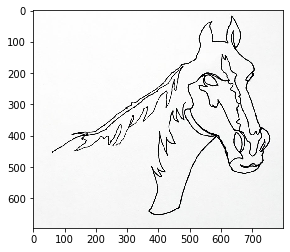

In [280]:
horse = Import('horse.jpg')
plt.imshow(horse)
print(np.shape(horse))

In [281]:
horse = NotGray(200, horse)
print(np.shape(horse))
horse = CollapseRBG(horse)
blackpix = black_coords(horse)
print(blackpix[0])
#start = blackpix[1300]
#horse_path=BestPath(start, horse)

(695, 800, 3)
[ 18. 631.]


In [282]:
print(len(horse_path[0]))

26114


In [283]:
y = np.array([0,1,2,3,4,5,0])
print(y)
y = y- y[0]
print(y)

[0 1 2 3 4 5 0]
[0 1 2 3 4 5 0]


26114
26114
1000


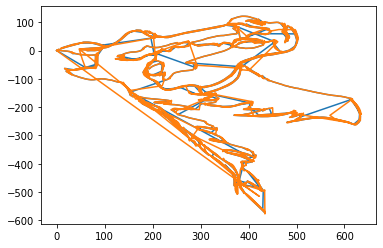

In [466]:
from scipy.interpolate import UnivariateSpline
##Going to make line approximation; using UnivariateSpline 
##Splines are linear approximations to a line. 
def lineapprox(path_x, path_y, plot=True, num_evals=1000):
    arange = np.arange(0, len(path_x),1)
    path_x_array = np.array(path_x)
    path_y_array = np.array(path_y)
    flip_y = -1*path_y_array
    x_approx = UnivariateSpline(arange, path_x_array)
    y_approx = UnivariateSpline(arange, path_y_array)
    #print(type(x_approx))
    # print(x_approx.size)
    x_approx_array = [0] * num_evals
    y_approx_array = [0] * num_evals
    index = 0
    for v in (np.linspace(0, len(path_x)-1, num_evals)):
        #print('type in here: ', type(x_approx(v)))
        #print('this item: ', x_approx(v))
        x_approx_array[index] = float(x_approx(v))
        y_approx_array[index] = float(y_approx(v))
        index += 1
    #print(x_approx_array)
    #print(y_approx_array)
    t = np.linspace(0, len(path_x), num_evals)
    endpoint_x = np.mean([x_approx_array[0], x_approx_array[-1]])
    x_approx_array[0] = endpoint_x
    x_approx_array[-1] = endpoint_x
    x_approx_array = x_approx_array - x_approx_array[0]                      
          
    endpoint_y = np.mean([y_approx_array[0], y_approx_array[-1]])
    y_approx_array[0] = endpoint_y
    y_approx_array[-1] = endpoint_y
    y_approx_array = y_approx_array - y_approx_array[0]
    
    if plot == True:
        #plt.plot(x,y, 'k')
        #plt.plot(*zip(*[(x_approx(v), y_approx(v)) for v in np.linspace(0, len(path_x)-1, 1000)]))
        plt.plot(x_approx_array, y_approx_array)
        #plt.gca().invert_xaxis()
        #plt.gca().invert_yaxis()
        #plt.plot(splines)
        #plt.plot(arange, x_approx)
        #pltl.plot(arange, y_approx)
    return x_approx_array, y_approx_array,t
x = horse_path[0]
y = horse_path[1]
print(len(y))
print(len(x))
horse_splines = lineapprox(x,y, plot=True)
horse_splines_more_evals =lineapprox(x,y, plot=True, num_evals = 10000)
print(len(horse_splines[0]))

I need to understand Zip alot better ??elena's help?
I need to understand UnivariateSplines better- data types
Want to figure out how to rotate
_Dont understand what is going on with the parametric plotting- need to do that by tomorrow
would like to have started FFT by end of tomorrow
Finished Image detector by end of Friday.
Make measurements Saturday and Sunday
Make poster Monday and Tuesday 

In [299]:
print('Howzit going??')
print("Lets get crackalackin")


Howzit going??
Lets get crackalackin


In [441]:
t_test = np.linspace(0, 2*np.pi, 1000)
f_test = np.sin(t_test)


In [442]:
def cn(f, t, n):
    ##t needs to be from 0 to T interval. 
    T = t[-1]
    delta_t = T/len(t)
   # print(T)
    integrand = (1/T)*f*np.exp(-1j*2*np.pi*n*t/T)
    #print(type(integrand))
    
    integral =(sum(integrand))*delta_t
    #print(type(integral))
    return integral
#outputs COMPLEX NUMBER



In [443]:
def f_one_x_one_n(f, t, n, cn, x):
    T = t[-1]
    term = cn*np.exp(1j*2*np.pi*n*x/T)
    return term
def fft_at_t(f,t,x, N): #Please o Please let N be even)
    f_of_t = 0
    #print('x=', x)
    for i in range(-N//2,N//2+1):
        c_i = cn(f,t,i)
        #print('c_',i,'=',c_i)
        additional_term =f_one_x_one_n(f,t,i,c_i,x)
        f_of_t += additional_term
        #print(i,'th term of f=', additional_term)
    return f_of_t  
test_fft_specific_t = fft_at_t(f_test, t_test, t_test[999], 2) 
print(test_fft_specific_t)

(-2.0621067181643721e-16+0j)


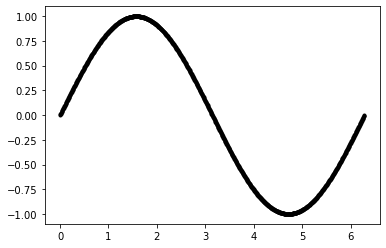

In [444]:
def F_all_t(f, t, N):
    FT_of_f = np.zeros(len(t))
    
    for i in range(len(t)):
        FT_of_f[i] = fft_at_t(f, t, t[i], N).real
    return FT_of_f
fft_test = F_all_t(f_test, t_test, 2)
plt.plot(t_test, fft_test, 'k.')
#print(fft_test)


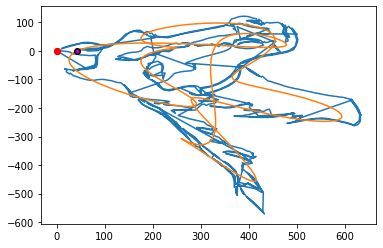

In [470]:
xt = np.array(horse_splines[0])
t = np.array(horse_splines[2])
yt = np.array(horse_splines[1])

fft_x = F_all_t(xt, t, 15)
fft_y = F_all_t(yt, t, 15)

plt.plot(xt,yt)
plt.plot(fft_x, fft_y)
plt.plot(fft_x[0], fft_y[0], 'ko')
plt.plot(xt[0], yt[0], 'ro')
plt.plot(xt[-1], yt[-1], 'ro')
plt.plot(fft_x[-1], fft_y[-1], 'm.')

In [467]:
xt_more_evals = np.array(horse_splines_more_evals[0])
t_more_evals = np.array(horse_splines_more_evals[2])
yt_more_evals = np.array(horse_splines_more_evals[1])

KeyboardInterrupt: 

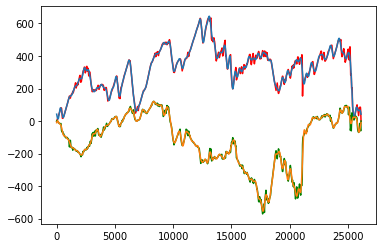

In [399]:
Test = np.array([[1,1,1,1,1], [1,0,0,0,1], [1,0,1,0,1], [1,1,1,1,1]])
black = np.where(Test==0)
black_coords = np.zeros((len(black[0]),2))

for i in range(len(black[0])):
    coord = np.array([black[0][i], black[1][i]])
    black_coords[i] = coord
    
print(black_coords[1])

start = np.array([1.,2.])

PairCoord_Index(start, black_coords)
    
#pair_dict = dict()
#for i in enumerate(black_coords):
#    coord_str = str(i[1])
#    print(coord_str)
#    pair_dict[coord_str] = i[0]
#    
#print(pair_dict)

#print(pair_dict[str()])

#print(pairer_dict)
    
# dictionary where keys are coordinates and the values are the indices 

#print(BestPath(start, Test))

[1. 2.]


1

In [471]:
from PIL import Image 
image_file = Image.open("greyish.jpg") # open colour image
image_file = image_file.convert('1') # convert image to black and white
image_file.save('bwgreyish.png')


In [472]:
#Screw it lets start making an image detetor:

hexagon = Import('hexagon.png')
circle = Import('circle.png')
hello = Import('helloworld.png')
#These should be very different 
 
hexagon= np.array(hexagon)
circle = np.array(circle)
hello = np.array(hello)

print(np.shape(hexagon))
print(np.shape(circle))
print(np.shape(hello))

for i in range(len(hexagon)):
    for j in range(len(hexagon[0])):
        if hello[i][j][3]!= 1:
            print [i,j]
resizehello = np.zeros(np.shape(circle))
resizehexagon = np.zeros(np.shape(circle))
for i in range(len(circle)):
    for j in range(len(circle[0])):
        for k in range(len(circle[0][0])):
            resizehello[i][j][k] = hello[i][j][k]
            resizehexagon[i][j][k] = hello[i][j][k]
            
#plt.imshow(resizehello)
def ImageDetector(TrueImage, GeneratedImage):
    """
    True image and Generated Image should be arrays of the same dimension
    """
    TI = TrueImage
    GI = GeneratedImage
    
    ##Put Montecarlo In place here
    
    

(127, 139, 4)
(127, 139, 3)
(127, 139, 4)


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>